# 时序数据

In [1]:
import numpy as np
import pandas as pd

## 时序中的基本对象

|概念|单元素类型|数组类型|pandas数据类型|
|:--:|:--------:|:------:|:------------:|
|Date times 时间戳|Timestamp|DatetimeIndex|datetime64[ns]|
|Time deltas 时间差|Timedelta|TimedeltaIndex|timedelta64[ns]|
|Time spans 时间段|Period|PeriodIndex|period[freq]|
|Date offsets 时间偏置|Dateoffset|None|None|

## 时间戳

### Timestamp的构造与属性

利用`pd.Timestamp`来生成单个时间戳，常见的日期格式都能够被识别和转换。

In [2]:
ts = pd.Timestamp('2020-1-8')

In [3]:
ts

Timestamp('2020-01-08 00:00:00')

In [4]:
ts = pd.Timestamp('2020/1/8 11:26')

In [5]:
ts

Timestamp('2020-01-08 11:26:00')

定义了时间戳之后，可以查看其属性：`year`, `month`, `day`, `hour`, `min`, `second`。

In [6]:
[ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second]

[2020, 1, 8, 11, 26, 0]

pandas以**纳秒**为单位记录时间。通过如下方式可以获取时间戳表示的范围：

In [7]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [8]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [9]:
# 计算pandas可以表示的年数，注意要调用year属性
pd.Timestamp.max.year - pd.Timestamp.min.year

585

### Datetime序列的生成

`pd.to_datetime`能够把一列时间戳格式的对象转换为时间序列：

In [10]:
# 时间戳列表被转换为DatetimeIndex格式
pd.to_datetime(['2021-1-1', '2021/1/3','2020.1.5'])

DatetimeIndex(['2021-01-01', '2021-01-03', '2020-01-05'], dtype='datetime64[ns]', freq=None)

In [11]:
# 时间戳Series被转换为datetime64[ns]格式
pd.to_datetime(pd.Series(['2021-1-1', '2021/1/3','2020.1.5']))

0   2021-01-01
1   2021-01-03
2   2020-01-05
dtype: datetime64[ns]

同时，`pd.to_datetime`还能实现将多列时间属性**拼接**为时间序列的操作，需要注意的是此时列名必须与时间戳对应的属性名一致：

In [12]:
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})

In [13]:
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

此外，还可以利用`pd.date_range`来生成时间序列。该方法用于生成**连续间隔**时间，需要指定下列参数中的其中三个：开始时间`start`、结束时间`end`、时间间隔`freq`和`periods`时间戳个数。

In [14]:
# 注意时间间隔的指定方式
pd.date_range('2020-1-1','2020-1-21', freq='10D') 

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [15]:
pd.date_range('2020-1-1','2020-2-28', periods=6) 

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

#### 练一练1

In [16]:
pd.Timestamp('2020-1-8').value

1578441600000000000

没有明确思路。

### dt对象

时序类型的序列上定义了`dt`对象来完成关于时间序列的操作。

第一类操作是取出时序数据的相关**属性**：

In [17]:
time = pd.Series(pd.to_datetime(['2019-4-4','2017-8-2','2021-2-2']))

In [18]:
# 求各元素所在月份(英文)
time.dt.month_name()

0       April
1      August
2    February
dtype: object

In [19]:
# 求各元素所在月份共有几天
time.dt.daysinmonth

0    30
1    31
2    28
dtype: int64

In [20]:
# 求各元素对应时期是星期几
time.dt.dayofweek
# 注意：0表示星期一，以此类推

0    3
1    2
2    1
dtype: int64

In [21]:
# 求个元素对应日期是星期几（英文）
time.dt.day_name()

0     Thursday
1    Wednesday
2      Tuesday
dtype: object

第二类操作是判断时间序列中的元素是否为**月/季/年的第一天或最后一天**，形如`is_year_start`和`is_year_end`。

第三类操作为**取整操作**，包括`round`、`ceil`和`floor`。它们的公共参数为`freq`，常用的包括`H`（小时）、`min`（分钟）和`S`（秒）、

In [22]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00','2020-1-1 22:35:00',freq='45min'))

In [23]:
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [24]:
# 参数中的数字n表示以“n小时”为单位取整
s.dt.round('1H')

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [25]:
s.dt.ceil('2H')

0   2020-01-01 22:00:00
1   2020-01-01 22:00:00
2   2020-01-02 00:00:00
dtype: datetime64[ns]

In [26]:
s.dt.floor('3H')

0   2020-01-01 18:00:00
1   2020-01-01 21:00:00
2   2020-01-01 21:00:00
dtype: datetime64[ns]

### 时间戳的切片与索引

时间戳序列常被用作索引。若想取时间戳序列的某个子列，可以考虑利用`dt`对象和布尔条件。以下为一些实例：

In [27]:
# 生成一个0-1随机序列，索引为2020年全年日期
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-1-1', '2020-12-31'))

In [28]:
# 取出索引序列的dt对象
idx = pd.Series(s.index).dt

In [29]:
# 取出每个月的第一天或最后一天
s[(idx.is_month_start|idx.is_month_end).values].head()

2020-01-01    0
2020-01-31    1
2020-02-01    0
2020-02-29    1
2020-03-01    1
dtype: int32

In [30]:
# 取出双休日
s[idx.dayofweek.isin([5,6]).values].head()

2020-01-04    1
2020-01-05    0
2020-01-11    1
2020-01-12    1
2020-01-18    1
dtype: int32

In [31]:
# 取出特定日期对应的取值
s['2020-9-9']

1

In [32]:
# 取出6月份的所有样本
s['2020-06'].head()

2020-06-01    1
2020-06-02    0
2020-06-03    1
2020-06-04    0
2020-06-05    0
Freq: D, dtype: int32

对于**连续**的时间戳序列来说，还可以通过切片来截取。

In [33]:
# 取出8月初到10月13日
s['2020-08':'2020-10-13']

2020-08-01    1
2020-08-02    1
2020-08-03    0
2020-08-04    0
2020-08-05    1
             ..
2020-10-09    1
2020-10-10    1
2020-10-11    1
2020-10-12    0
2020-10-13    1
Freq: D, Length: 74, dtype: int32

## 时间差

### Timedelta的生成

可以通过`pd.Timedelta`来直接构造时间差。

In [34]:
pd.Timedelta(days=1, minutes=25) # 注意参数要加's'!

Timedelta('1 days 00:25:00')

可以通过`pd.to_timedelta`和`timedelta_range`来生成时间差序列。

In [35]:
pd.timedelta_range('0s', '1000s', freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

`Timedelta`序列上也定义了`dt`对象，上面的主要属性有：`days`, `seconds`, `total_seconds`, `microseconds`和`nanoseconds`等。

### Timedelta的运算

In [36]:
td1 = pd.Timedelta(days=1)
td2 = pd.Timedelta(days=3)
ts  = pd.Timestamp('20200101')

In [37]:
# 与标量相乘
td1 * 2

Timedelta('2 days 00:00:00')

In [38]:
# 与时间差加减
td1 + td2

Timedelta('4 days 00:00:00')

In [39]:
# 与时间戳加减
ts + td2

Timestamp('2020-01-04 00:00:00')

上述对于单个元素的运算同样适用于序列。

## 日期偏置

### Offset对象

日期偏置可以被视作一种特殊的**时间差**。

In [40]:
# 求2020年9月第一个周一的日期
pd.Timestamp('20200831')+pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-09-07 00:00:00')

在上述命令中，`WeekOfMonth(week=m, weekday=n)`表示每个月第$(m+1)$周的第$(n+1)$天。

In [41]:
# 求2020年9月7日后的第30个工作日
pd.Timestamp('20200907')+pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

在上述命令中，`BDay`即"Business Day"，表示工作日。与之相关的对象是`CDay`，指的是"custom business day"，即**自定义**工作日，其中参数`n`表示天数，`weekmask`指定了天数代表的星期（用三个字母缩写），`holidays`代表需要跳过的日期。

通过如下示例可以较好地理解`CDay`的用法：

In [42]:
dr = pd.date_range('20200108', '20200116')
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
2020-01-12    6
2020-01-13    0
2020-01-14    1
2020-01-15    2
2020-01-16    3
Freq: D, dtype: int64

In [43]:
dr.to_list()

[Timestamp('2020-01-08 00:00:00', freq='D'),
 Timestamp('2020-01-09 00:00:00', freq='D'),
 Timestamp('2020-01-10 00:00:00', freq='D'),
 Timestamp('2020-01-11 00:00:00', freq='D'),
 Timestamp('2020-01-12 00:00:00', freq='D'),
 Timestamp('2020-01-13 00:00:00', freq='D'),
 Timestamp('2020-01-14 00:00:00', freq='D'),
 Timestamp('2020-01-15 00:00:00', freq='D'),
 Timestamp('2020-01-16 00:00:00', freq='D')]

In [44]:
# 定义日期偏置对象，移至当前日期的下一个星期三或星期五，但是排除2020年1月9日
my_filter = pd.offsets.CDay(n=1, weekmask='Thu Fri',holidays=['2020-01-09'])

In [45]:
[i + my_filter for i in dr]

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00')]

### 偏置字符串

`pd.date_range`的`freq`参数取值可以为`Offset`对象，而后者有可以用对应的**字符串来替代**使用。仔细体会如下示例：

In [46]:
pd.date_range('20200101','20200331', freq='MS') # 月初

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [47]:
pd.date_range('20200101','20200331', freq='M') # 月末

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [48]:
pd.date_range('20200101','20200110', freq='B') # 工作日

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [49]:
pd.date_range('20200101','20200208', freq='W-MON') # 周一

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
               '2020-02-03'],
              dtype='datetime64[ns]', freq='W-MON')

In [50]:
pd.date_range('20200101','20200208',freq='WOM-1MON') # 每月第一个周一

DatetimeIndex(['2020-01-06', '2020-02-03'], dtype='datetime64[ns]', freq='WOM-1MON')

## 时序中的滑窗与分组

### 滑动窗口

`rolling`对象的参数可以为`freq`关键词，以下为示例：

In [51]:
import matplotlib.pyplot as plt

In [52]:
# 取2020年的工作日
idx = pd.date_range('20200101', '20201231', freq='B')

In [53]:
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)

In [54]:
# 构造滑窗对象，注意参数为frequency string
r = s.rolling('30D')

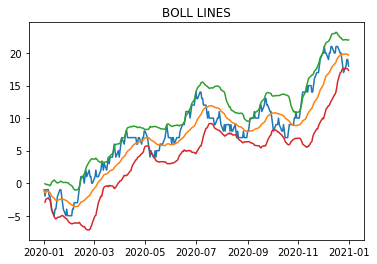

In [55]:
plt.title('BOLL LINES')
plt.plot(s)
plt.plot(r.mean())
plt.plot(r.mean()+r.std()*2)
plt.plot(r.mean()-r.std()*2)

类似地，如果`shift`函数作用在了以`datetime64`为索引的序列上，也可以指定`freq`单位实现**日期索引**的滑动：

In [56]:
s.shift(freq='10B').head()

2020-01-15   -1
2020-01-16   -2
2020-01-17   -1
2020-01-20   -1
2020-01-21   -2
dtype: int32

In [57]:
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int32

### 重采样

重采样`resample`对象可以被视为对时间序列进行**分组**得到的对象。

In [58]:
# 以10天为一组，求均值
s.resample('10D').mean().head()

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

In [59]:
# 可以自定义处理函数
s.resample('10D').apply(lambda x:x.max()-x.min()).head()

2020-01-01    3
2020-01-11    4
2020-01-21    4
2020-01-31    2
2020-02-10    4
Freq: 10D, dtype: int32

## 练习

### Ex1: 太阳辐射数据集

In [60]:
df = pd.read_csv('data/solar.csv', usecols=['Data','Time','Radiation','Temperature'])

In [61]:
df.head()

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48


**第1问**

In [62]:
df.dtypes

Data            object
Time            object
Radiation      float64
Temperature      int64
dtype: object

In [63]:
Datetime = pd.to_datetime(df.Data + df.Time)

In [64]:
Datetime.name = 'Datetime'

In [65]:
df = pd.concat([Datetime.to_frame(),df.iloc[:,2:]],1)

In [66]:
df = df.set_index('Datetime').sort_index()

In [67]:
df.head()

,Radiation,Temperature
Datetime,,
2016-09-01 00:00:08,2.58,51
2016-09-01 00:05:10,2.83,51
2016-09-01 00:20:06,2.16,51
2016-09-01 00:25:05,2.21,51
2016-09-01 00:30:09,2.25,51


**第2问**

In [68]:
times = pd.Series(df.index)

In [69]:
times.head()

0   2016-09-01 00:00:08
1   2016-09-01 00:05:10
2   2016-09-01 00:20:06
3   2016-09-01 00:25:05
4   2016-09-01 00:30:09
Name: Datetime, dtype: datetime64[ns]

**a部分**

In [70]:
times.diff(1).sort_values(ascending=False).head(3)

25923   2 days 14:24:49
24522   1 days 04:55:00
7417    1 days 00:04:53
Name: Datetime, dtype: timedelta64[ns]

In [71]:
idx = times.diff(1).sort_values(ascending=False).head(3).index.to_list()

In [72]:
for i in idx:
    print(df.iloc[[i-1,i],].index.to_list())

[Timestamp('2016-12-05 20:45:53'), Timestamp('2016-12-08 11:10:42')]
[Timestamp('2016-11-29 19:05:02'), Timestamp('2016-12-01 00:00:02')]
[Timestamp('2016-09-29 23:55:26'), Timestamp('2016-10-01 00:00:19')]


**b部分**

没读懂题目要求，故尝试理解答案。

In [73]:
# 生成间隔时间
s = df.index.to_series().reset_index(drop=True).diff().dt.total_seconds()

In [74]:
# 将极端值设为缺失
res = s.mask((s>s.quantile(0.99))|(s<s.quantile(0.01)))

C:\Users\LWKM\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LWKM\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


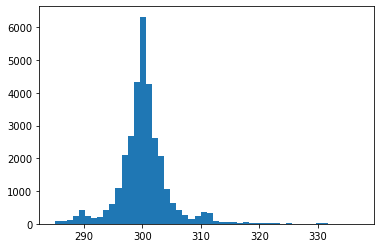

In [75]:
_=plt.hist(res,bins=50)

**第3问** 

**a部分**

In [76]:
cor = df.rolling('6H').corr()

In [77]:
idr = pd.IndexSlice

In [78]:
cor.loc[idr[:,'Radiation'],idr['Temperature']]

Datetime                      
2016-09-01 00:00:08  Radiation         NaN
2016-09-01 00:05:10  Radiation         NaN
2016-09-01 00:20:06  Radiation         inf
2016-09-01 00:25:05  Radiation        -inf
2016-09-01 00:30:09  Radiation        -inf
                                    ...   
2016-12-31 23:35:02  Radiation    0.416187
2016-12-31 23:40:01  Radiation    0.416565
2016-12-31 23:45:04  Radiation    0.328574
2016-12-31 23:50:03  Radiation    0.261883
2016-12-31 23:55:01  Radiation    0.262406
Name: Temperature, Length: 32686, dtype: float64

参考答案的做法更规范：

In [79]:
df.Radiation.rolling('6H').corr(df.Temperature)

Datetime
2016-09-01 00:00:08         NaN
2016-09-01 00:05:10         NaN
2016-09-01 00:20:06         inf
2016-09-01 00:25:05        -inf
2016-09-01 00:30:09        -inf
                         ...   
2016-12-31 23:35:02    0.416187
2016-12-31 23:40:01    0.416565
2016-12-31 23:45:04    0.328574
2016-12-31 23:50:03    0.261883
2016-12-31 23:55:01    0.262406
Length: 32686, dtype: float64

**b部分**

In [80]:
df.resample('6H',origin='03:00:00')['Temperature'].mean().head()

Datetime
2016-08-31 21:00:00    51.218750
2016-09-01 03:00:00    50.033333
2016-09-01 09:00:00    59.379310
2016-09-01 15:00:00    57.984375
2016-09-01 21:00:00    51.393939
Freq: 6H, Name: Temperature, dtype: float64

**c部分**

不知道如何实现，故尝试理解答案。

In [81]:
# 先前移6个小时
my_dt = df.index.shift(freq='-6H')

以下这一步为关键：

In [82]:
# 找到最邻近的时间索引
int_loc = [df.index.get_loc(i, method='nearest') for i in my_dt]

In [83]:
res = df.Radiation.iloc[int_loc]

In [84]:
res.tail()

Datetime
2016-12-31 17:35:01    15.96
2016-12-31 17:40:06    11.98
2016-12-31 17:45:02     9.33
2016-12-31 17:50:01     8.49
2016-12-31 17:55:02     5.84
Name: Radiation, dtype: float64

### Ex2: 水果销量数据集

In [85]:
df = pd.read_csv('data/fruit.csv')

In [86]:
df.head(3)

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15
2,2019-06-05,Peach,19


In [87]:
df.Date = pd.to_datetime(df.Date)

In [88]:
df = df.sort_values(['Date','Fruit']).reset_index(drop=True)

In [89]:
df.Fruit.unique()

array(['Apple', 'Banana', 'Grape', 'Peach', 'Pear'], dtype=object)

**第1问**

**a部分**

In [90]:
sale = df.groupby(['Date','Fruit']).sum().reset_index()

可能需要长变宽：

In [91]:
sale = sale.pivot(index='Date',columns='Fruit',values='Sale')

In [92]:
gsale = sale.Grape.resample('SMS').sum()

In [93]:
gsale.head()

Date
2019-01-01    10709
2019-01-15    12135
2019-02-01     9134
2019-02-15    10973
2019-03-01     9139
Freq: SMS-15, Name: Grape, dtype: int64

In [94]:
gsale.resample('MS').first()/gsale.resample('MS').last()

Date
2019-01-01    0.882489
2019-02-01    0.832407
2019-03-01    0.670851
2019-04-01    0.875372
2019-05-01    0.765635
2019-06-01    0.880839
2019-07-01    1.181905
2019-08-01    0.950072
2019-09-01    0.980867
2019-10-01    0.853451
2019-11-01    1.149994
2019-12-01    0.805612
Freq: MS, Name: Grape, dtype: float64

**b部分**

In [95]:
sale.Pear.resample('D').sum().resample('M').last()

Date
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
2019-06-30    179
2019-07-31    757
2019-08-31    813
2019-09-30    858
2019-10-31    753
2019-11-30    859
2019-12-31    648
Freq: M, Name: Pear, dtype: int64

答案的实现方式：

In [96]:
df[df.Date.dt.is_month_end].query("Fruit=='Pear'").groupby('Date').Sale.sum()

Date
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
2019-06-30    179
2019-07-31    757
2019-08-31    813
2019-09-30    858
2019-10-31    753
2019-11-30    859
Name: Sale, dtype: int64

**c部分**

In [97]:
psale = sale.Peach.resample('D').sum()

本题不知如何实现，故尝试理解答案。

In [98]:
# 注意：“BM”表示“Business Monthend”
df[df.Date.isin(pd.date_range('20190101','20191231',freq='BM'))].query("Fruit=='Pear'").groupby('Date').Sale.mean()

Date
2019-01-31    60.500000
2019-02-28    59.538462
2019-03-29    56.666667
2019-04-30    64.800000
2019-05-31    61.600000
2019-06-28    67.222222
2019-07-31    63.083333
2019-08-30    71.714286
2019-09-30    78.000000
2019-10-31    62.750000
2019-11-29    62.789474
Name: Sale, dtype: float64

**d部分**

In [99]:
sale.Apple.resample('5D').mean().resample('M').last()

Date
2019-01-31    604.20
2019-02-28    632.00
2019-03-31    510.20
2019-04-30    579.00
2019-05-31    603.80
2019-06-30    543.80
2019-07-31    481.40
2019-08-31    679.80
2019-09-30    760.20
2019-10-31    525.80
2019-11-30    544.80
2019-12-31    662.75
Freq: M, Name: Apple, dtype: float64

**第2问**

In [100]:
df['month']=df.Date.dt.month

In [101]:
df['weekday']=df.Date.dt.dayofweek + 1

In [102]:
sdf = df.copy()

In [103]:
sdf.head()

,Date,Fruit,Sale,month,weekday
0,2019-01-01,Apple,6,1,2
1,2019-01-01,Apple,15,1,2
2,2019-01-01,Apple,1,1,2
3,2019-01-01,Apple,54,1,2
4,2019-01-01,Apple,45,1,2


In [104]:
dcount = sdf.groupby(['Fruit','Date'])['Sale'].count().reset_index()

In [105]:
dcount

,Fruit,Date,Sale
0,Apple,2019-01-01,6
1,Apple,2019-01-02,8
2,Apple,2019-01-03,15
3,Apple,2019-01-04,7
4,Apple,2019-01-05,11
...,...,...,...
1815,Pear,2019-12-26,8
1816,Pear,2019-12-27,15
1817,Pear,2019-12-28,10
1818,Pear,2019-12-29,11


In [106]:
sdf = sdf.merge(dcount,on=['Date','Fruit'],how='left', suffixes=['_q','_c'])

长表变宽表：

In [107]:
sdf.pivot_table(index=['Fruit','month'],columns='weekday',values='Sale_c',aggfunc='mean').head()

weekday              1          2          3          4          5          6  \
Fruit month                                                                     
Apple 1      11.608696  10.560000  10.640000  10.111111   8.187500  11.285714   
      2      11.279070  10.200000  13.638298   9.228571   9.242424  10.263158   
      3      11.325581  11.409091  10.513514   8.612903  10.807692   9.476190   
      4      10.148936  11.653846  12.720930  12.319149   8.290323   9.857143   
      5      10.813953  11.956522   8.282051  11.655172   9.521739  14.818182   

weekday              7  
Fruit month             
Apple 1       6.217391  
      2      12.066667  
      3       8.952381  
      4       9.972973  
      5       8.290323

**第3问**

In [108]:
asale = df[df.Fruit=='Apple'].set_index('Date').resample('D')['Sale'].sum()

In [109]:
asale.head()

Date
2019-01-01    189
2019-01-02    482
2019-01-03    890
2019-01-04    550
2019-01-05    583
Freq: D, Name: Sale, dtype: int64

本题不知道如何实现，只能学习参考答案。

In [110]:
# 取出工作日苹果销量
df_apple = df[(df.Fruit=='Apple')&(~df.Date.dt.dayofweek.isin([5,6]))]

In [111]:
# 计算每个工作日苹果总销量
s = pd.Series(df_apple.Sale.values,index=df_apple.Date).groupby('Date').sum()

In [112]:
res = s.rolling('10D').mean().reindex(pd.date_range('20190101','20191231')).fillna(method='ffill')

本题的关键是理解日期索引的扩充。原来表中的数据在新表中会根据索引**自动对齐**，新表索引无对应数据则设为缺失。